In [35]:
# setup  the environment
import networkx as nx
import yaml
import random
import matplotlib.pyplot as plt
import os
from utils import *
%matplotlib inline

# Load the graph

Loading graph from file... Done!


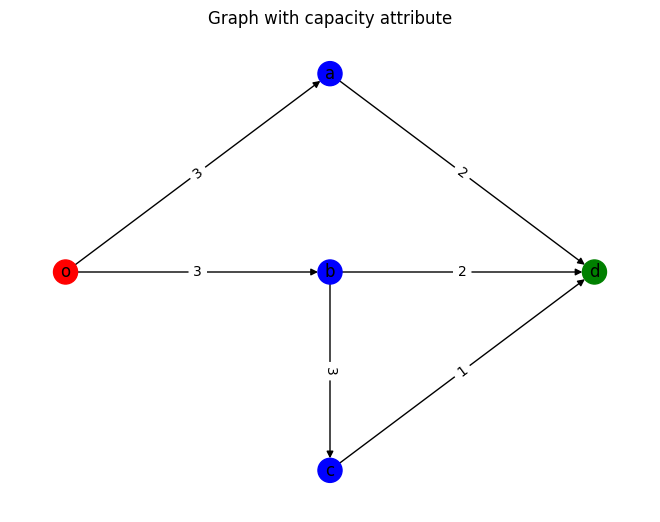

In [36]:
# path of graph.yaml
path = 'config/graph.yaml'

if os.path.exists(path):
    print("Loading graph from file...", end=" ")
    # load graph from file
    with open(path, 'r') as f:
        data = yaml.load(f, Loader=yaml.FullLoader)
        G = nx.node_link_graph(data)
    print("Done!")
else:
    print("Creating graph...", end=" ")
    # create graph
    G = create_G()
    print("Done!")
    # save graph to file
    print("Saving graph to file...", end=" ")
    with open(path, 'w') as f:
        data = nx.node_link_data(G)
        yaml.dump(data, f)
    print("Done!")

# draw graph
draw(G, attribute='capacity')
    

# Question 1

In [37]:
question1 = """Point a:
What is the minimum aggregate capacity that needs to be removed for no 
feasible flow from o to d to exist?
"""
answer = """Answer:
The maximum flow is corresponding to the minimum aggregate capacity
we need to subtract to isolate o and d.

In our case"""
# find and print maximum flow
max_flow = nx.maximum_flow_value(G, 'o', 'd')

print(question1)
print(f"{answer}, {max_flow}.")

Point a:
What is the minimum aggregate capacity that needs to be removed for no 
feasible flow from o to d to exist?

Answer:
The maximum flow is corresponding to the minimum aggregate capacity
we need to subtract to isolate o and d.

In our case, 5.


# Question 2

Point b:
What is the maximum aggregate capacity that can be removed from
the edges without affecting the maximum throughput from o to d?

Answer:
The maximum aggregate capacity that can be removed from the links
can be obtained by subtracting the maximum flow of each edge from 
its capacity, and summing up the result.

In our case 3.


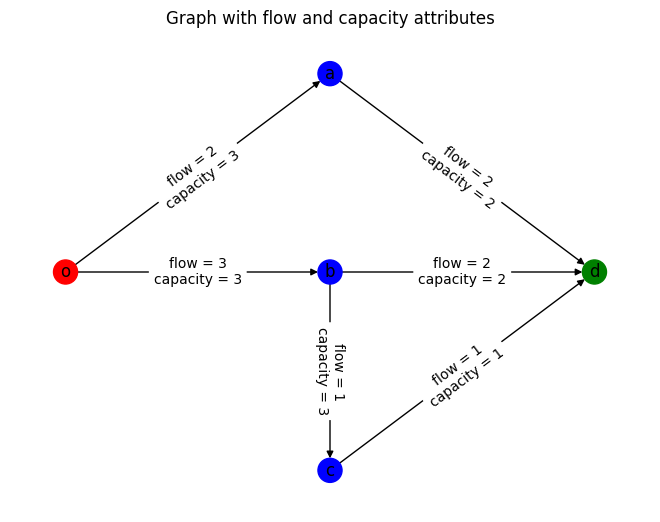

In [38]:
question2 = """Point b:
What is the maximum aggregate capacity that can be removed from
the edges without affecting the maximum throughput from o to d?
"""

answer="""Answer:
The maximum aggregate capacity that can be removed from the links
can be obtained by subtracting the maximum flow of each edge from 
its capacity, and summing up the result.

In our case"""

# update max flows
update_edge_flows(G)

# find residual capacity, the unused one, for each edge
residuals = update_residual_capacities(G)

# print answer
print(question2)
print(f"{answer} {sum(residuals.values())}.")

# draw the graph with edge labels
draw_all(G)

# Question 3

In [39]:
question3 = """Point c:
You are given x > 0 extra units of capacity. How should you distribute them
in order to maximize the throughput that can be sent from o to d? Plot the 
maximum throughput from o to d as a function of x ≥0.
"""
answer = """Answer:
I would work this way:
1.  Find the minimum cut partition.
3.  Add one unit of capacity of one of the edges in the cut.
4.  Repeat until all the capacity has been added."""

print(question3)
print(answer)

Point c:
You are given x > 0 extra units of capacity. How should you distribute them
in order to maximize the throughput that can be sent from o to d? Plot the 
maximum throughput from o to d as a function of x ≥0.

Answer:
I would work this way:
1.  Find the minimum cut partition.
3.  Add one unit of capacity of one of the edges in the cut.
4.  Repeat until all the capacity has been added.


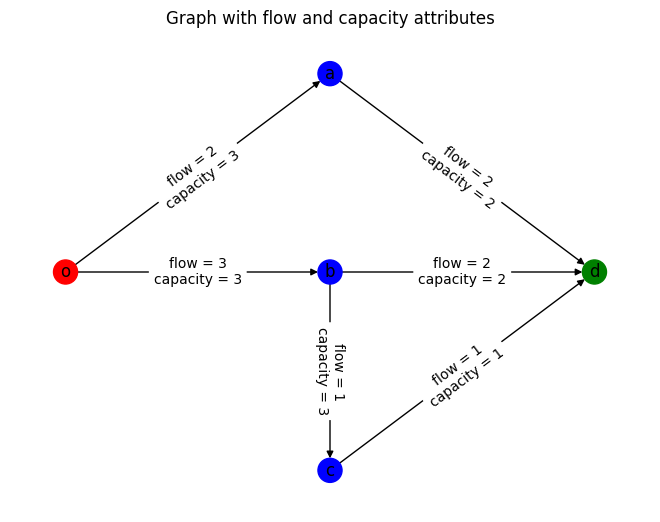

Capacity to be added: 10
Minimum cut value: 5
Minimum cut partition: {'o', 'c', 'a', 'b'}, {'d'}
Edge ('o', 'a') = 2 / 3
Edge ('o', 'b') = 3 / 3
Edge ('a', 'd') = 2 / 2
Edge ('b', 'd') = 2 / 2
Edge ('b', 'c') = 1 / 3
Edge ('c', 'd') = 1 / 1
Edge ('c', 'd') increased.

Capacity to be added: 9
Minimum cut value: 5
Minimum cut partition: {'o', 'a'}, {'d', 'c', 'b'}
Edge ('o', 'a') = 2 / 3
Edge ('o', 'b') = 3 / 3
Edge ('a', 'd') = 2 / 2
Edge ('b', 'd') = 2 / 2
Edge ('b', 'c') = 1 / 3
Edge ('c', 'd') = 1 / 2
Edge ('a', 'd') increased.

Capacity to be added: 8
Minimum cut value: 6
Minimum cut partition: {'o', 'a'}, {'d', 'c', 'b'}
Edge ('o', 'a') = 3 / 3
Edge ('o', 'b') = 3 / 3
Edge ('a', 'd') = 3 / 3
Edge ('b', 'd') = 2 / 2
Edge ('b', 'c') = 1 / 3
Edge ('c', 'd') = 1 / 2
Edge ('a', 'd') increased.

Capacity to be added: 7
Minimum cut value: 6
Minimum cut partition: {'o'}, {'d', 'c', 'a', 'b'}
Edge ('o', 'a') = 3 / 3
Edge ('o', 'b') = 3 / 3
Edge ('a', 'd') = 3 / 4
Edge ('b', 'd') = 2 / 2
Edg

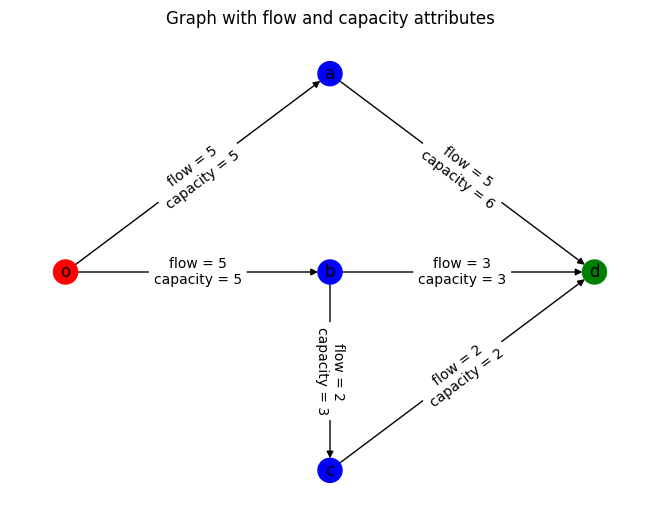

In [44]:
# Capacity to be added
capacity = 10

# copy of G, in order to not modify the original graph
G_new = G.copy()
G_old = G.copy()

# draw the initial graph
draw_all(G_new)

# loop until all the capacity has been added
while True:
    # find minimum cut partition and print info
    max_flow, partition = nx.minimum_cut(G_old, 'o', 'd')
    reachable, non_reachable = partition
    print(f"Capacity to be added: {capacity}")
    print(f"Minimum cut value: {max_flow}")
    print(f"Minimum cut partition: {reachable}, {non_reachable}")

    # Update attributes of G_new.
    update_edge_flows(G_new)
    update_residual_capacities(G_new)
    
    # Print info of edges.
    edge_flows = nx.get_edge_attributes(G_new, 'flow')
    edge_capacities = nx.get_edge_attributes(G_new, 'capacity')
    edge_names = nx.get_edge_attributes(G_new, 'name')
    for edge in G_new.edges:
        print(f"Edge {edge} = {edge_flows[edge]} / {edge_capacities[edge]}")    

    # Break if capacity is finished, after updating and printing.
    if capacity <= 0:
        break

    # Find edges which start in first and end in second partition.
    edges_to_increase = [
        edge
        for edge in G_old.edges
        if edge[0] in reachable and edge[1] in non_reachable
    ]

    # Increase capacity of edge in the cut, randomly chosen.
    edge = edges_to_increase[random.randint(0, len(edges_to_increase)-1)]
    G_new[edge[0]][edge[1]]['capacity'] += 1

    # Print the edge which increased the cut value.
    print(f"Edge {edge} increased.\n")  
    
    # Update capacity to be added.
    capacity -= 1

    # Update graph.
    G_old = G_new.copy()

# draw the final graph
draw_all(G_new)
